# Tugas Besar Tahap 2 Classification <br>
# Nama Anggota Kelompok : <br>
 **1. Anang Furkon Rifai - 1301180229** <br>
 **2. Marcello Rasel Hidayatullah - 1301184019**

# Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

# Load Dataset

In [ ]:
from google.colab import files
file = files.upload()

Saving salju_test.csv to salju_test (3).csv
Saving salju_train.csv to salju_train (3).csv


In [ ]:
# Dataset Test
salju_test = pd.read_csv('salju_test.csv') 

# Mengganti nama kolom "BersaljuBesok" menjadi "Class"
salju_test.rename(columns={'BersaljuBesok':'Class'}, inplace=True)

salju_test.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
0,04/11/2010,C39,11.0,27.5,0.0,NaN,6.4,WSW,46.0,W,W,20.0,28.0,39.0,56.0,1013.0,1012.4,4.0,7.0,25.7,23.6,No,No
1,26/03/2015,C35,10.0,19.9,0.2,NaN,NaN,WNW,56.0,W,NW,24.0,33.0,76.0,32.0,1017.0,1015.2,8.0,1.0,10.7,18.9,No,Yes
2,22/03/2016,C18,9.2,27.2,0.0,5.2,10.4,SSW,33.0,NE,N,13.0,19.0,89.0,27.0,1018.6,1015.7,0.0,1.0,13.9,26.3,No,No
3,09/12/2011,C31,17.7,27.0,0.0,4.6,6.7,SW,35.0,E,SSE,20.0,15.0,55.0,41.0,1010.2,1008.6,7.0,6.0,22.3,26.4,No,No
4,20/05/2017,C14,2.3,7.9,88.0,NaN,NaN,NW,46.0,W,WNW,13.0,9.0,98.0,95.0,NaN,NaN,NaN,NaN,4.4,6.0,Yes,No


In [ ]:
# Dataset Train
salju_train = pd.read_csv('salju_train.csv')

# Mengganti nama kolom 'BersaljuBesok' menjadi 'Class'
salju_train.rename(columns={'BersaljuBesok':'Class'}, inplace=True)

# Drop Kolom id agar jumlah kolom data train & data test sama
salju_train = salju_train.drop(columns=['id'])

salju_train.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
0,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,NaN,WSW,0.0,13.0,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,SW,WNW,13.0,20.0,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,SE,SE,15.0,26.0,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,N,SW,13.0,19.0,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,NNW,ESE,22.0,19.0,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


# Pre Processing Data

In [ ]:
# Mengecek jumlah data pada kolom 'Class' pada data test
salju_test['Class'].value_counts()

No     13824
Yes     3939
Name: Class, dtype: int64

In [ ]:
# Mengecek jumlah data pada kolom 'Class' pada data train
salju_train['Class'].value_counts()

Tidak    82701
Ya       23963
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


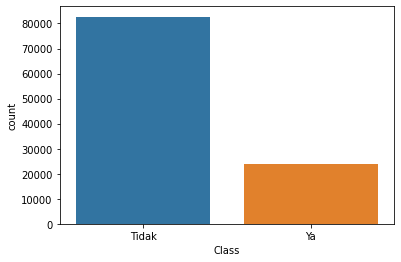

In [ ]:
# Memvisualisasi data pada kolom 'Class' pada data train
train_plot = sns.countplot(salju_train['Class'])
train_plot.set_xticklabels(['Tidak','Ya'])
plt.show()

## Pre Processing Data Train

In [ ]:
train_0 = salju_train[salju_train['Class'] == 'Tidak']
train_1 = salju_train[salju_train['Class'] == 'Ya']

print("Class 0 :", train_0.shape)
print("Class 1 :", train_1.shape)

Class 0 : (82701, 23)
Class 1 : (23963, 23)


In [ ]:
# Oversampling Data
train_count_0, train_count_1 = salju_train['Class'].value_counts()
train_1_over = train_1.sample(train_count_0, replace = True)

salju_train_sampling = pd.concat([train_1_over, train_0], axis=0)

print("Total Class 1 and 0 :", salju_train_sampling['Class'].value_counts())

Total Class 1 and 0 : Ya       82701
Tidak    82701
Name: Class, dtype: int64


In [ ]:
# Mengecek missing values
salju_train_sampling.isnull().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                       824
SuhuMax                       330
Hujan                        2329
Penguapan                   71237
SinarMatahari               78453
ArahAnginTerkencang         11587
KecepatanAnginTerkencang    11477
ArahAngin9am                11014
ArahAngin3pm                 4773
KecepatanAngin9am            1613
KecepatanAngin3pm            3191
Kelembaban9am                2307
Kelembaban3pm                4531
Tekanan9am                  16285
Tekanan3pm                  16324
Awan9am                     60701
Awan3pm                     63908
Suhu9am                      1234
Suhu3pm                      3454
BersaljuHariIni              2329
Class                           0
dtype: int64

In [ ]:
# Mengatasi Missing Values
salju_train_sampling.fillna(salju_train_sampling.median(), inplace=True)                # Nilai Numeric diisi dengan nilai median
salju_train_sampling = salju_train_sampling.fillna(salju_train_sampling.mode().iloc[0]) # Nilai String diisi dengan nilai yang paling sering muncul pada atribut

In [ ]:
# Mengecek missing values
salju_train_sampling.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
Class                       0
dtype: int64

In [ ]:
# Mengecek type atribut
print(salju_train_sampling.dtypes)

Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
Class                        object
dtype: object


In [ ]:
# Menentukan Fitur Categorical
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = salju_train_sampling.columns.values.tolist()
for col in features:
    if salju_train_sampling[col].dtype in numerics: continue
    categorical_columns.append(col)

# Encoding Fitur Categorical
for col in categorical_columns:
    if col in salju_train_sampling.columns:
        enco = LabelEncoder()
        enco.fit(list(salju_train_sampling[col].astype(str).values))
        salju_train_sampling[col] = enco.transform(list(salju_train_sampling[col].astype(str).values))

In [ ]:
# Mengecek type atribut
print(salju_train_sampling.dtypes)

Tanggal                       int64
KodeLokasi                    int64
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang           int64
KecepatanAnginTerkencang    float64
ArahAngin9am                  int64
ArahAngin3pm                  int64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni               int64
Class                         int64
dtype: object


In [ ]:
salju_train_sampling.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
52166,390,19,9.8,20.6,0.0,4.4,6.8,13,39.0,3,13,13.0,19.0,67.0,67.0,1016.5,1014.2,6.0,6.0,16.6,19.1,0,1
12404,1548,26,12.6,19.4,2.2,4.4,6.8,6,46.0,13,7,17.0,19.0,54.0,56.0,1013.9,1012.6,6.0,6.0,16.9,17.0,1,1
38354,2727,21,10.9,14.3,1.6,2.6,0.0,11,43.0,3,13,0.0,0.0,100.0,97.0,1008.6,1009.0,7.0,7.0,11.4,13.8,1,1
69641,1139,45,24.7,30.6,7.2,2.0,5.3,12,48.0,12,13,19.0,24.0,75.0,73.0,1007.8,1005.5,7.0,7.0,28.7,29.4,1,1
90552,2986,32,5.7,17.9,0.0,4.4,2.7,1,22.0,6,5,9.0,9.0,88.0,82.0,1017.9,1016.1,3.0,5.0,13.4,16.1,0,1


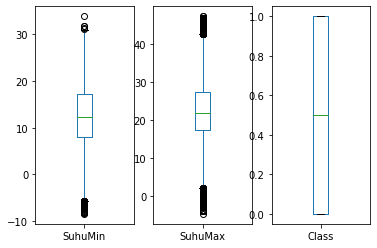

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Mengecek Outliers
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_train_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_train_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_train_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [ ]:
#Metode IQR untuk SuhuMin
Q1=salju_train_sampling['SuhuMin'].quantile(0.25)
Q3=salju_train_sampling['SuhuMin'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

8.0
17.2
9.2
-5.799999999999999 31.0


In [ ]:
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMin']< Upper_Whisker]
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMin']> Lower_Whisker]

In [ ]:
#Metode IQR untuk SuhuMax
Q1=salju_train_sampling['SuhuMax'].quantile(0.25)
Q3=salju_train_sampling['SuhuMax'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

17.2
27.4
10.2
1.9000000000000004 42.699999999999996


In [ ]:
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMax']< Upper_Whisker]
salju_train_sampling = salju_train_sampling[salju_train_sampling['SuhuMax']> Lower_Whisker]

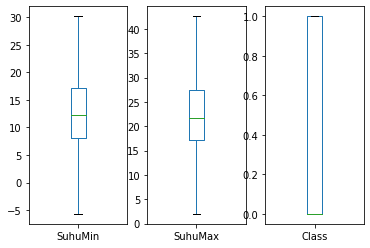

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Mengecek Outliers setelah menggunakan metode IQR
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_train_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_train_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_train_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [ ]:
# Mengecek Data Unique
def check(data):
  for col in data.columns:
    print(col, data[col].unique())

check(salju_train_sampling)

Tanggal [ 390 1548 2727 ... 3009 1001 3152]
KodeLokasi [19 26 21 45 32  1 35 11 13 39 20 48  9 12 15 29 46 47  2 36 25 38 27  3
 28 22 31  6  7 33 18 37 24 23  5 43 34 44 17 14 41 42  4  0 10  8 30 40
 16]
SuhuMin [ 9.8 12.6 10.9 24.7  5.7 11.3  9.2 17.5  2.9 16.4 14.7 20.6  6.5 23.7
 21.8 10.  11.1 10.1 11.4 20.4 22.9  7.4  3.  10.6 20.1  6.  15.  24.4
  8.3 13.4 10.7 22.  23.  24.6 10.2 21.9 17.4 11.  22.4 13.2 11.5 13.7
 15.8 22.7 -1.1 12.1 25.9  7.1  5.4 15.6 14.8 23.9 22.3  7.7  4.2 18.4
 20.  16.6  5.8 12.4 21.6  9.7 12.3 27.2 15.7 22.8 19.   5.2  6.1 18.7
  7.9 13.8 14.3  7.  12.9  8.8 15.1  9.5 20.5  8.1 22.5 12.   9.  12.7
  1.8  4.1 17.8  7.2 19.1 11.6 14.4 13.3 15.5  2.7 20.2 14.1  6.8 11.2
  9.9 11.7 18.9 16.8  0.6  2.6 24.1  6.2 16.   7.6 10.3 19.3 25.   0.4
  8.9 12.2  9.3 18.8 17.9 19.5 12.5 25.1 23.3 13.9 24.3 27.4 10.4 23.5
 19.2 25.8 20.9 13.5  7.5 20.7 16.1  8.  24.9  8.7 11.8 18.3 14.6  4.7
  5.3  5.   5.5  9.6  6.6  6.4 21.3  9.1  8.5 14.  24.2  4.  18.2 21.1
 17.7

## Pre Processing Data Test

In [ ]:
test_0 = salju_test[salju_test['Class'] == 'No']
test_1 = salju_test[salju_test['Class'] == 'Yes']

print("Class 0 :", test_0.shape)
print("Class 1 :", test_1.shape)

Class 0 : (13824, 23)
Class 1 : (3939, 23)


In [ ]:
# Oversampling Data
test_count_0, test_count_1 = salju_test['Class'].value_counts()
test_1_over = test_1.sample(test_count_0, replace = True)

salju_test_sampling = pd.concat([test_1_over, test_0], axis=0)

print("Total Class 1 and 0 :", salju_test_sampling['Class'].value_counts())

Total Class 1 and 0 : No     13824
Yes    13824
Name: Class, dtype: int64


In [ ]:
# Mengecek missing values
salju_test_sampling.isnull().sum()

Tanggal                         0
KodeLokasi                      0
SuhuMin                       114
SuhuMax                        63
Hujan                         365
Penguapan                   11841
SinarMatahari               13052
ArahAnginTerkencang          1924
KecepatanAnginTerkencang     1910
ArahAngin9am                 1843
ArahAngin3pm                  730
KecepatanAngin9am             240
KecepatanAngin3pm             481
Kelembaban9am                 394
Kelembaban3pm                 699
Tekanan9am                   2598
Tekanan3pm                   2595
Awan9am                     10191
Awan3pm                     10716
Suhu9am                       221
Suhu3pm                       534
BersaljuHariIni               365
Class                           0
dtype: int64

In [ ]:
# Mengatasi Missing Values
salju_test_sampling.fillna(salju_test_sampling.median(), inplace=True)                # Nilai Numeric diisi dengan nilai median
salju_test_sampling = salju_test_sampling.fillna(salju_test_sampling.mode().iloc[0]) # Nilai String diisi dengan nilai yang paling sering muncul pada atribut

In [ ]:
salju_test_sampling.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
Class                       0
dtype: int64

In [ ]:
# Mengecek type atribut
print(salju_test_sampling.dtypes)

Tanggal                      object
KodeLokasi                   object
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang          object
KecepatanAnginTerkencang    float64
ArahAngin9am                 object
ArahAngin3pm                 object
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni              object
Class                        object
dtype: object


In [ ]:
# Menentukan Fitur Categorical
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = salju_test_sampling.columns.values.tolist()
for col in features:
    if salju_test_sampling[col].dtype in numerics: continue
    categorical_columns.append(col)

# Encoding Fitur Categorical
for col in categorical_columns:
    if col in salju_test_sampling.columns:
        enco = LabelEncoder()
        enco.fit(list(salju_test_sampling[col].astype(str).values))
        salju_test_sampling[col] = enco.transform(list(salju_test_sampling[col].astype(str).values))

In [ ]:
# Mengecek type atribut
print(salju_test_sampling.dtypes)

Tanggal                       int64
KodeLokasi                    int64
SuhuMin                     float64
SuhuMax                     float64
Hujan                       float64
Penguapan                   float64
SinarMatahari               float64
ArahAnginTerkencang           int64
KecepatanAnginTerkencang    float64
ArahAngin9am                  int64
ArahAngin3pm                  int64
KecepatanAngin9am           float64
KecepatanAngin3pm           float64
Kelembaban9am               float64
Kelembaban3pm               float64
Tekanan9am                  float64
Tekanan3pm                  float64
Awan9am                     float64
Awan3pm                     float64
Suhu9am                     float64
Suhu3pm                     float64
BersaljuHariIni               int64
Class                         int64
dtype: object


In [ ]:
salju_test_sampling.head()

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,Class
13480,1207,6,5.5,9.4,49.6,4.4,7.0,11,72.0,11,11,31.0,26.0,98.0,98.0,1012.0,1014.3,8.0,8.0,7.0,8.6,1,1
3267,1779,46,12.1,21.9,0.4,5.2,6.7,6,28.0,1,2,7.0,17.0,67.0,58.0,1025.0,1020.2,1.0,3.0,16.2,21.0,0,1
5966,996,20,7.5,14.6,1.2,1.2,0.2,0,43.0,4,5,9.0,11.0,81.0,63.0,1011.8,1009.5,6.0,8.0,8.9,12.5,1,1
9005,1039,48,23.0,28.7,47.0,2.8,0.0,10,39.0,8,2,17.0,13.0,74.0,66.0,1006.7,1005.4,7.0,8.0,25.5,27.2,1,1
9991,790,37,2.1,12.1,7.4,1.0,1.5,5,35.0,3,6,0.0,15.0,100.0,75.0,1019.2,1016.3,6.0,6.0,5.5,11.5,1,1


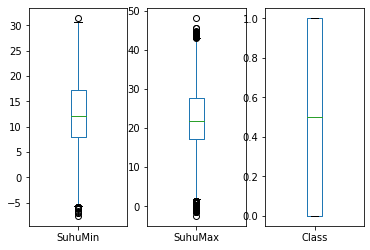

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Mengecek Outliers
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_test_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_test_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_test_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [ ]:
#Metode IQR untuk SuhuMin
Q1=salju_test_sampling['SuhuMin'].quantile(0.25)
Q3=salju_test_sampling['SuhuMin'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

8.0
17.2
9.2
-5.799999999999999 31.0


In [ ]:
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMin']< Upper_Whisker]
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMin']> Lower_Whisker]

In [ ]:
#Metode IQR untuk SuhuMax
Q1=salju_test_sampling['SuhuMax'].quantile(0.25)
Q3=salju_test_sampling['SuhuMax'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

17.3
27.6
10.3
1.8499999999999996 43.050000000000004


In [ ]:
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMax']< Upper_Whisker]
salju_test_sampling = salju_test_sampling[salju_test_sampling['SuhuMax']> Lower_Whisker]

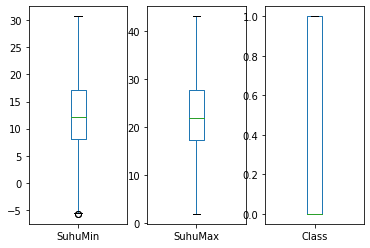

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Mengecek Outliers setelah menggunakan metode IQR
f,axes = plt.subplots(1,3)
plt.figure(figsize=(20,10))
salju_test_sampling['SuhuMin'].plot(kind='box',ax=axes[0])
salju_test_sampling['SuhuMax'].plot(kind='box',ax=axes[1])
salju_test_sampling['Class'].plot(kind='box',ax=axes[2])

plt.show()

In [ ]:
# Mengecek Data Unique
def check(data):
  for col in data.columns:
    print(col, data[col].unique())

check(salju_test_sampling)

Tanggal [1207 1779  996 ...   62 1359  435]
KodeLokasi [ 6 46 20 48 37 35 13 40 47 31 33 28  5 22 23  3 15  0 26  1 12 32 10 39
 18 41 45 14  8 38 30 36  9 29 17 19 11  7 24 27 25 34 16 44  4 21  2 42
 43]
SuhuMin [ 5.5 12.1  7.5 23.   2.1  7.8 19.  18.9 18.  22.3 14.6  2.3  7.2 10.
  1.9 20.9 20.6 10.4 23.7  8.2 11.3  5.2 13.2  6.8  8.7 13.5  9.8  8.
 14.7 10.8 14.1 19.2  6.6 13.9 25.1  7.  21.5  7.3 11.6 10.6 -1.9  6.3
 10.2 21.8 12.2 13.3 24.  11.5 15.  13.7 24.4  5.9  4.2 19.4 12.6 19.7
 16.3 17.8  6.9 25.  15.3 12.4  3.7 13.  12.8 20.7 11.7 10.9 11.2  5.
  3.9 17.2  4.9 16.4  4.6  9.4 13.1 10.7 24.1 10.5 19.6 17.  17.9 24.8
  7.7 14.9 13.8  3.2  0.4  4.3  5.6 21.3 24.5 12.7 19.3 20.  23.9  9.9
  5.7 19.9 15.9 16.9 17.3 20.4 19.5 14.8 20.1 24.2 26.5 21.2 15.7  8.3
 23.8 15.1 19.1  9.2  6.1  8.5 22.7 15.5 16.6 13.4  1.6 14.2 18.8 11.
 18.2 23.5 17.6 20.5 18.3  6.7  7.6 14.  23.2 20.8 24.3 27.4 17.1  0.6
 26.6 16.  20.3  9.6 16.7  8.4 11.8 15.2 21.7  9.5  8.1  1.5 16.5 12.
 14.4 20.2

# Data Preparation
x = Feature<br>
y = Class Target

In [ ]:
#Data train
x_train = salju_train_sampling.drop(['Class'], axis=1)
y_train = salju_train_sampling['Class'].values

In [ ]:
x_train = x_train.values

In [ ]:
#Data test
x_test = salju_test_sampling.drop(['Class'], axis=1)
y_test = salju_test_sampling['Class'].values

In [ ]:
x_test = x_test.values

In [ ]:
len(salju_train_sampling.columns)

23

In [ ]:
len(salju_train_sampling.columns)

23

# Model

## Decision Tree

In [ ]:
clf =  tree.DecisionTreeClassifier(class_weight = 'balanced', min_samples_leaf = 15, random_state = 32)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=32, splitter='best')

In [ ]:
y_pred_clf = clf.predict(x_test)

In [ ]:
#Showing Confusion Matrix to know True Positive, False Positive, True Negative and False Negative
cm_df = pd.DataFrame(cm, 
                      columns = ['Predicted Negative', 'Predicted Positive'], 
                      index = ['Actual Negative', 'Actual Positive'])

#Assign True Positive, False Positive, True Negative and False Negative intu variable
TN = cm_df.loc['Actual Negative','Predicted Negative']
FN = cm_df.loc['Actual Positive','Predicted Negative']
FP = cm_df.loc['Actual Negative','Predicted Positive']
TP = cm_df.loc['Actual Positive','Predicted Positive']
ACC = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy       : ',ACC)
print('')
print(classification_report(y_test,y_pred_clf))

Accuracy       :  0.7355633035519721

              precision    recall  f1-score   support

           0       0.70      0.81      0.75     13773
           1       0.77      0.66      0.71     13765

    accuracy                           0.73     27538
   macro avg       0.74      0.73      0.73     27538
weighted avg       0.74      0.73      0.73     27538



## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(x_test)
print('Accuracy: {:.2f}'.format(logreg.score(x_test, y_test)))
print('')
print(classification_report(y_test,y_pred))

Accuracy: 0.76

              precision    recall  f1-score   support

           0       0.75      0.79      0.77     13773
           1       0.78      0.74      0.76     13765

    accuracy                           0.76     27538
   macro avg       0.77      0.76      0.76     27538
weighted avg       0.77      0.76      0.76     27538



## Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train.ravel())
y_pred = gnb.predict(x_test)

In [ ]:
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
print('')
print(classification_report(y_test,y_pred))

Accuracy : 0.7407219115404169

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     13773
           1       0.76      0.70      0.73     13765

    accuracy                           0.74     27538
   macro avg       0.74      0.74      0.74     27538
weighted avg       0.74      0.74      0.74     27538



# Kesimpulan Akurasi

In [ ]:
print('Decision Tree')
print('Accuracy       : ',ACC)
print('')
print('Logistic Regression')
print('Accuracy       : {:.2f}'.format(logreg.score(x_test, y_test)))
print('')
print('Naive bayes')
print('Accuracy       :',metrics.accuracy_score(y_test, y_pred))

Decision Tree
Accuracy       :  0.7355633035519721

Logistic Regression
Accuracy       : 0.76

Naive bayes
Accuracy       : 0.7407219115404169
